# Modelo de la clase de GeoPandas

## ¿Que vamos a ver hoy?

Libreria Geopandas

- Como manipular datos geolocalizados y como visualizarlos.
- Tipos de datos GIS



# Informacion conceptual (vectorizada) vs imagenes

![flecha img](Flecha.png)

![flecha svg](flecha.svg)

# Vamos a usar los datos que usamos hace dos clases para hacerlos algunas preguntas...

- ¿Podemos graficar un mapa del arbolado de la ciudad de manera mas linda, incluyendo los contornos de la ciudad?
- ¿Podemos calcular cual es la comuna con mayor densidad de arboles?
- ¿Podemos representar esa informacion en un mapa?
- ¿Podemos aprovechar que sabemos donde esta cada arbol y a que calle pertencen graficar el recorrido de una calle?
- ¿Podemos validar la ubicación sabiendo a que comuna pertenece el arbol?

# En https://data.buenosaires.gob.ar/dataset/comunas esta la info de las comunas

# Vamos a leer el archivo

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.wkt



In [2]:

# Descargamos y abrimos el archivo
comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
comunas.head()



,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,MULTIPOLYGON (((-58.4883373673246 -34.62016035...,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,MULTIPOLYGON (((-58.498384839883 -34.596367656...,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,MULTIPOLYGON (((-58.5033113250844 -34.59385615...,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


In [3]:
#Trasnformamos la columna WKT
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')
geo_comunas.head()

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06
1,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06
2,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07
3,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07
4,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07


0      Annotation(-58.3949, -34.5858, '2.0')
1      Annotation(-58.4436, -34.6168, '6.0')
2     Annotation(-58.5029, -34.6278, '10.0')
3     Annotation(-58.4969, -34.6061, '11.0')
4     Annotation(-58.4904, -34.5663, '12.0')
5     Annotation(-58.4223, -34.5739, '14.0')
6     Annotation(-58.4628, -34.5919, '15.0')
7     Annotation(-58.4541, -34.5545, '13.0')
8      Annotation(-58.3888, -34.6423, '4.0')
9      Annotation(-58.4206, -34.6174, '5.0')
10     Annotation(-58.4519, -34.6365, '7.0')
11     Annotation(-58.4027, -34.6138, '3.0')
12     Annotation(-58.4991, -34.6517, '9.0')
13     Annotation(-58.4622, -34.6745, '8.0')
14     Annotation(-58.3717, -34.6063, '1.0')
dtype: object

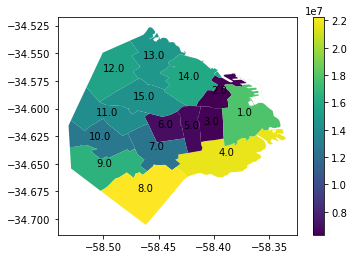

In [4]:
fig, ax = plt.subplots()
geo_comunas.plot(ax=ax, column="AREA", legend=True)
geo_comunas.apply(lambda x: ax.annotate(text=x['COMUNAS'], xy=x.WKT.centroid.coords[0], ha='center'), axis=1)

In [5]:
# Vamos a crearnos un geopandas del dataset del arbolado

arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles.head()

C:\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [6]:
geo_arboles = gpd.GeoDataFrame(arboles,geometry=gpd.points_from_xy(arboles.long, arboles.lat))
geo_arboles.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,POINT (-58.37856 -34.59490)
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,POINT (-58.38153 -34.59232)
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,POINT (-58.37910 -34.59194)
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,POINT (-58.38071 -34.59155)
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,POINT (-58.38071 -34.59155)


<AxesSubplot:>

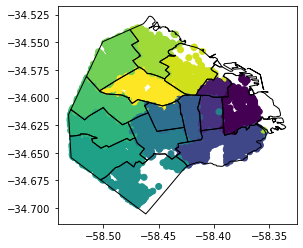

In [26]:

fig, ax = plt.subplots()
geo_arboles.sample(10000).plot(ax=ax, column="comuna")
geo_comunas.plot(ax=ax, facecolor="none")


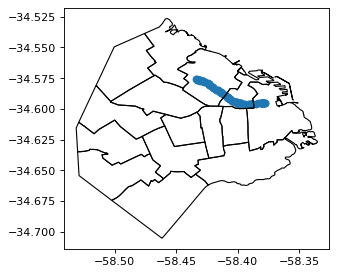

In [7]:
# Queremos ahora marcar una calle, por ejemplo Av Santa Fe, para eso vamos a buscar los extremos filtrando los datos de los arboles que esten en esa calle y buscando las alturas maximas y minimas

geo_arboles_stafe = geo_arboles[geo_arboles["calle_nombre"] == "Santa Fe Av."]

fig, ax = plt.subplots(dpi=80)

geo_arboles_stafe.sample(100).plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

plt.savefig('santafe.png', dpi=80)





<AxesSubplot:>

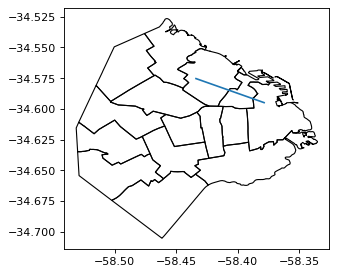

In [8]:
#Buscamos ahora los extremos
from shapely.geometry import LineString
from shapely.geometry import Point

geo_arboles_stafe = geo_arboles[geo_arboles["calle_nombre"] == "Santa Fe Av."]

geo_arboles_stafe = geo_arboles_stafe.sort_values("calle_chapa")

geo_arboles_stafe = geo_arboles_stafe[:-geo_arboles_stafe["calle_chapa"].isna().sum()] # Nos sacamos de encima los datos que no figuran 


geo_arboles_stafe["geometry"].iloc[0]
geo_arboles_stafe["geometry"].iloc[-1]

linea = LineString([geo_arboles_stafe["geometry"].iloc[0],geo_arboles_stafe["geometry"].iloc[-1]])

geo_linea = gpd.GeoSeries([linea])



fig, ax = plt.subplots(dpi=80)

geo_linea.plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')



<AxesSubplot:>

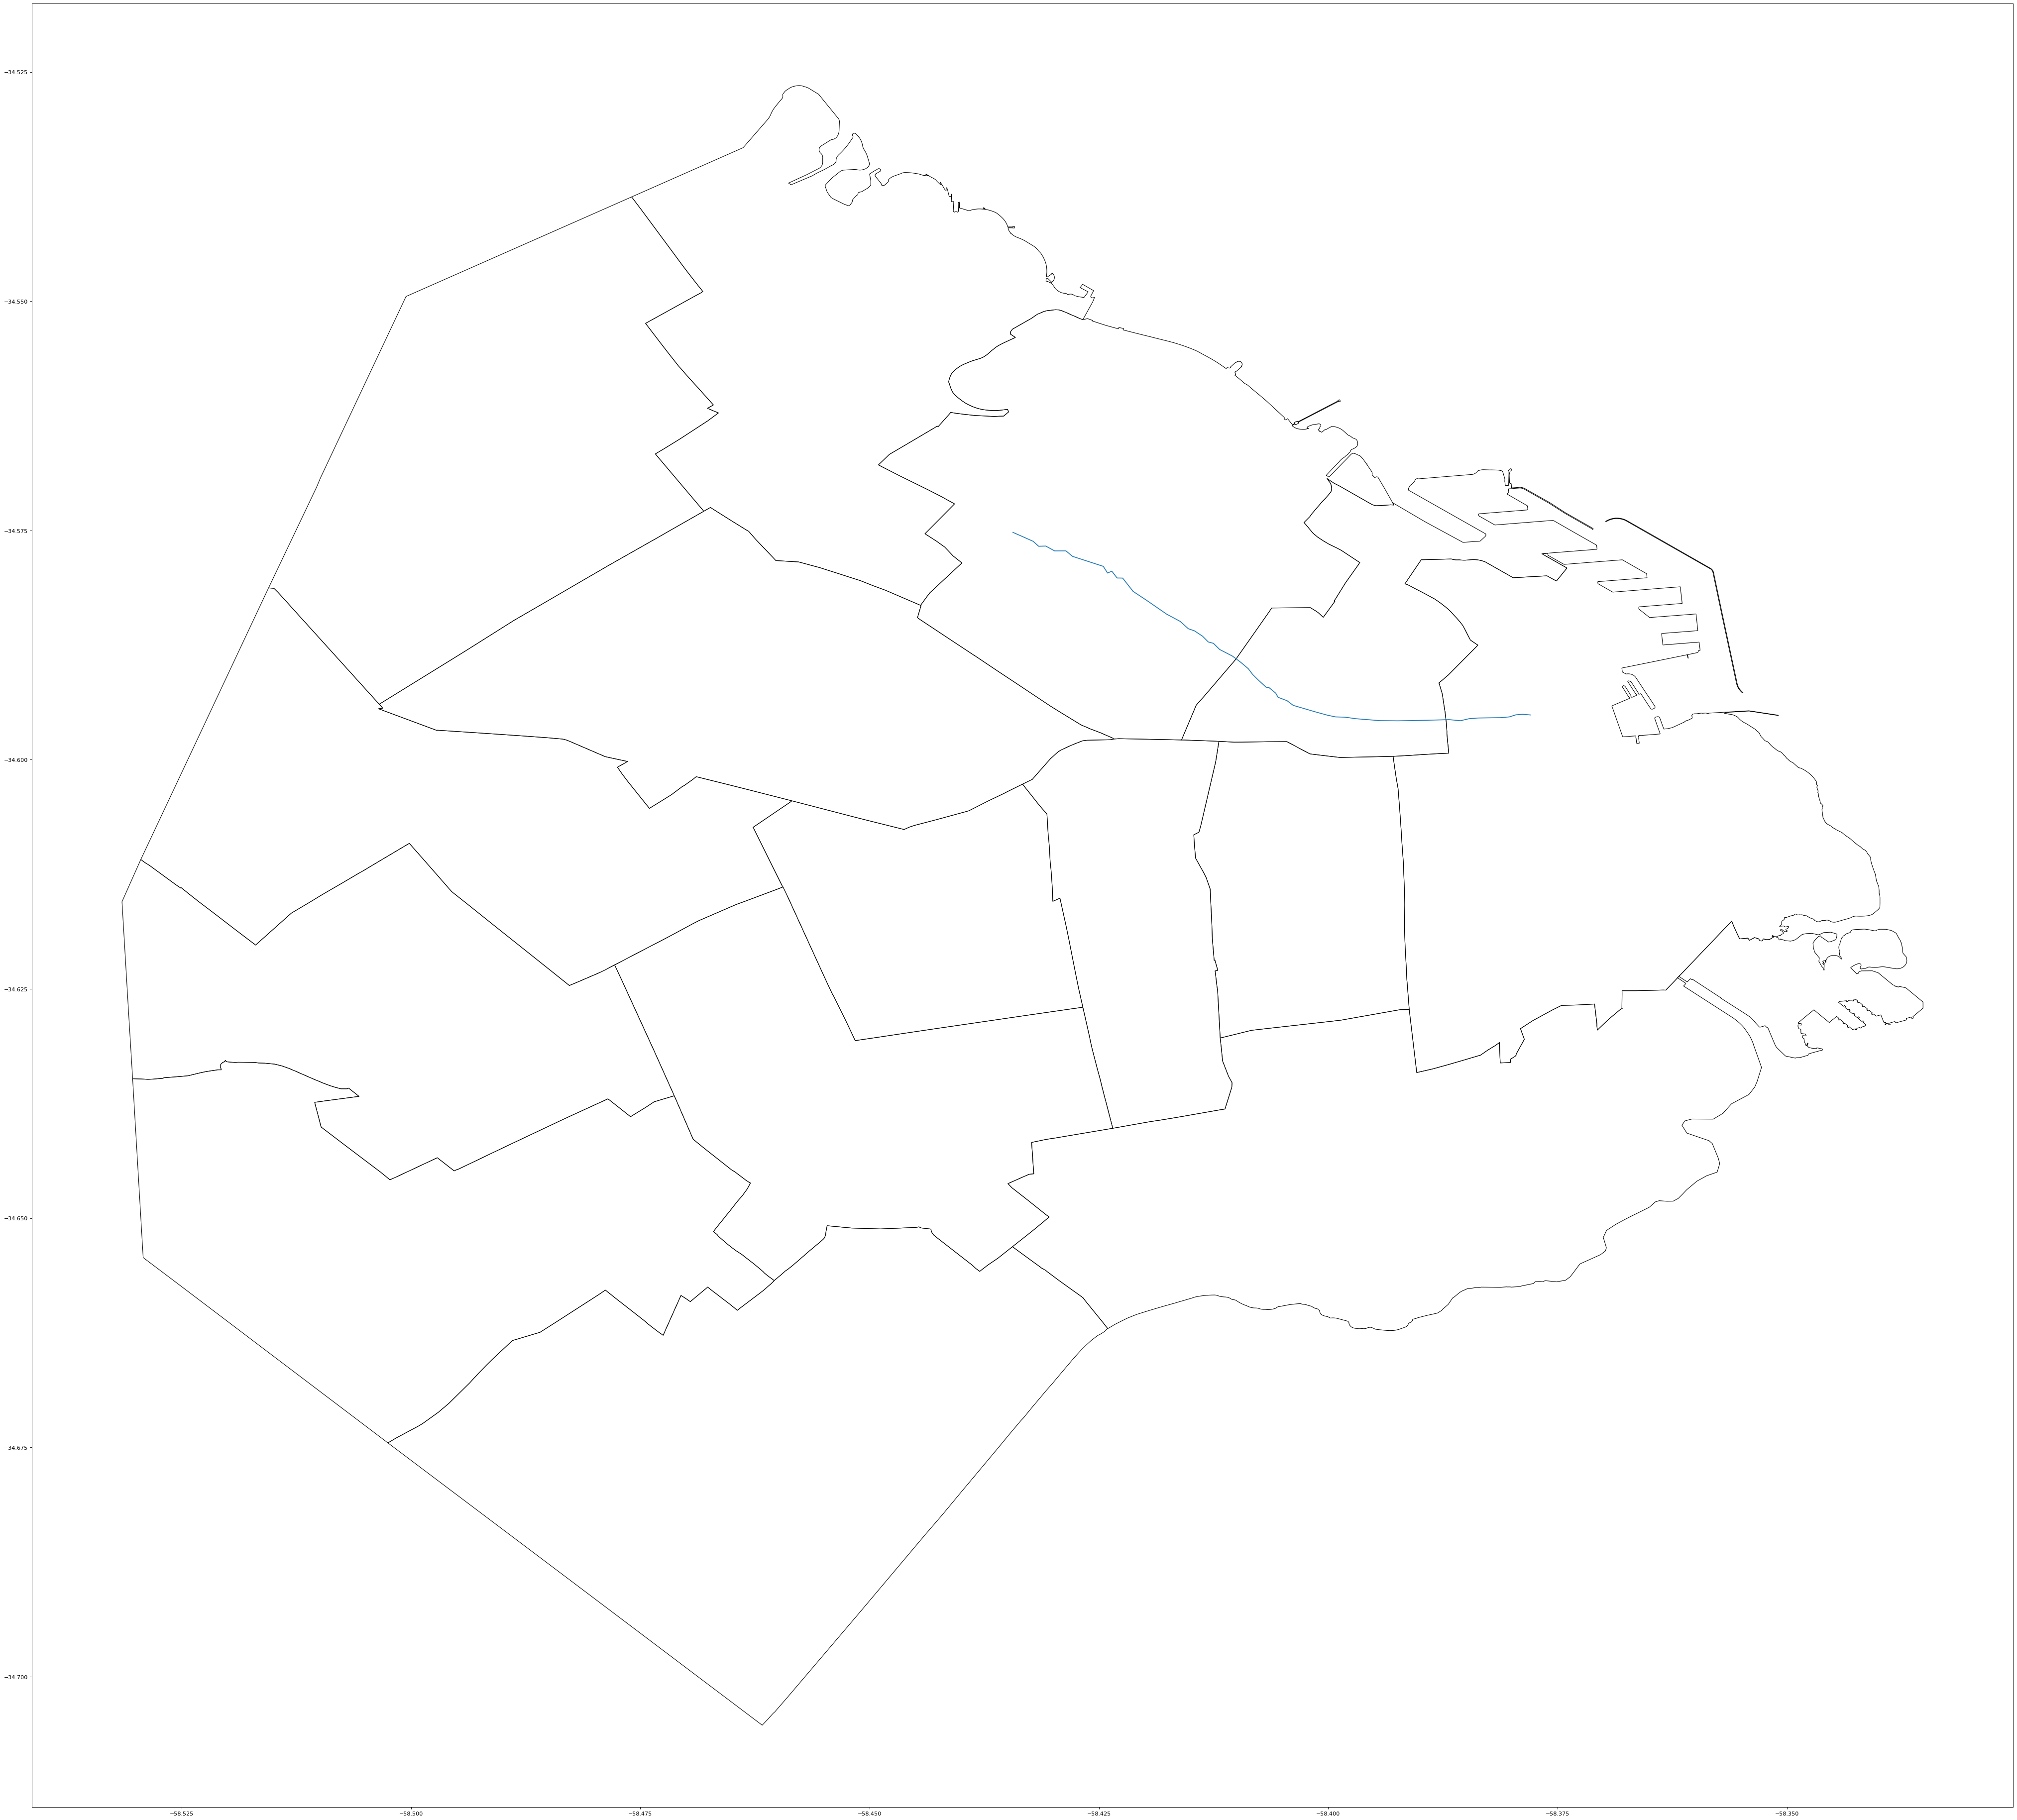

In [11]:
# Ahora le vamos a agregar resolucion

n = 10
puntos = geo_arboles_stafe["geometry"][0::n].to_list()

linea = LineString(puntos)
geo_linea = gpd.GeoSeries(linea)

fig, ax = plt.subplots(figsize=(80, 60), dpi=80)

geo_linea.plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

<AxesSubplot:>

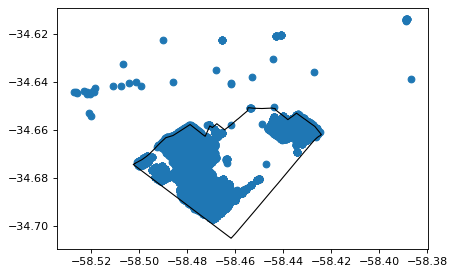

In [81]:
# Ahora queremos validar si los arboles estan marcados en la comuna correcta. Como son muchos datos vamos a trabajar solo con una comuna.

comuna = 8


geo_comunas_seleccionada = geo_comunas[geo_comunas["COMUNAS"]==comuna]
geo_arbolado_comuna_seleccionada = geo_arboles[geo_arboles["comuna"] == comuna]



fig, ax = plt.subplots(dpi=80)

geo_arbolado_comuna_seleccionada.plot(ax=ax)
geo_comunas_seleccionada.plot(ax=ax, facecolor="none", edgecolor='black')

In [82]:
geometria = geo_comunas_seleccionada["WKT"].iloc[0]



for i in geo_arbolado_comuna_seleccionada.index:
    point = geo_arbolado_comuna_seleccionada.loc[i, 'geometry']
    geo_arbolado_comuna_seleccionada.loc[i,"pertenece"] = geometria.contains(point)

    


C:\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

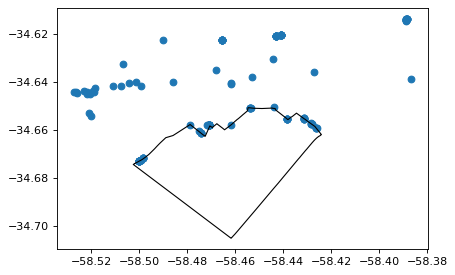

In [83]:
fig, ax = plt.subplots(dpi=80)

geo_arbolado_comuna_seleccionada[geo_arbolado_comuna_seleccionada["pertenece"]==False].plot(ax=ax)
geo_comunas_seleccionada.plot(ax=ax, facecolor="none", edgecolor='black')

In [89]:
geo_comunas.crs
geo_comunas.crs = {'init' :'epsg:4326'}
geo_comunas_m = geo_comunas.copy()
geo_comunas_m = geo_comunas_m.to_crs({'init': 'epsg:6933'})

In [90]:
geo_comunas_m["WKT"].iloc[0].area

6317259.431183082

In [91]:

for i in geo_comunas.index:
    arboles_en_comuna = len(geo_arboles[geo_arboles["comuna"]==geo_comunas.loc[i,"COMUNAS"]])
    geo_comunas.loc[i,"arboles"] = arboles_en_comuna
    area = geo_comunas_m.loc[i,"WKT"].area
    geo_comunas.loc[i,"area"] = area

geo_comunas["densidad"] = geo_comunas["arboles"]/geo_comunas["area"]

geo_comunas.head()


,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,arboles,area,densidad
0,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,7115.0,6.317259e+06,0.001126
1,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,15591.0,6.851031e+06,0.002276
2,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,33421.0,1.265656e+07,0.002641
3,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,37340.0,1.412011e+07,0.002644
4,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,38818.0,1.557094e+07,0.002493


<AxesSubplot:>

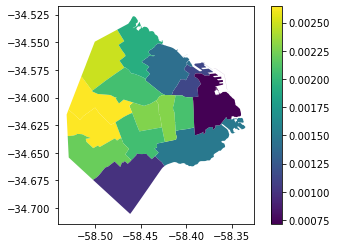

In [92]:
fig, ax = plt.subplots()
geo_comunas.plot(ax=ax, column="densidad", legend=True)
# geo_comunas.apply(lambda x: ax.annotate(text=x['COMUNAS'], xy=x.WKT.centroid.coords[0], ha='center'), axis=1)

In [ ]:
df.groupby(["pais","distrito"])["ventas"].sum()